# Task 1 - Understanding the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Predictive_analytics_data.csv')
# Displaying concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  480 non-null    int64  
 1   Feature1    449 non-null    float64
 2   Feature2    449 non-null    float64
 3   Feature3    449 non-null    float64
 4   Feature4    449 non-null    float64
 5   Feature5    449 non-null    float64
 6   Feature6    449 non-null    float64
 7   Feature7    480 non-null    float64
 8   Feature8    480 non-null    float64
 9   Feature9    480 non-null    float64
 10  Feature10   480 non-null    int64  
 11  Feature11   480 non-null    float64
 12  Feature12   449 non-null    float64
 13  Feature13   449 non-null    float64
 14  Feature14   449 non-null    float64
 15  Feature15   449 non-null    float64
 16  Feature16   449 non-null    float64
 17  Feature17   449 non-null    float64
 18  Feature18   480 non-null    float64
 19  Feature19   480 non-null    f

In [ ]:
# Drop the first column (Unnamed: 0)
df = df.iloc[:, 1:]

# Check the modified DataFrame
print(df.head())


   Feature1     Feature2   Feature3   Feature4   Feature5  Feature6  Feature7  \
0  0.134842  1191.742676  41.507889   4.691728   3.049478  2.138430  4.305591   
1  0.118853  1206.649292  41.781891   5.887320   3.350271  2.698908  4.039053   
2  0.538094  2164.658936  72.728867  16.221436  12.332704  7.785572  3.701066   
3  0.201133  2034.619629  72.419518   6.974368   3.560071  2.219646  3.950444   
4  0.109943  1207.436646  42.912621   9.026774   2.954104  3.698219  3.732934   

      Feature8    Feature9  Feature10  ...  Feature16  Feature17  Feature18  \
0  4272.666992  139.076599         38  ...   0.510055   0.806333   0.449914   
1  4274.158691  139.125168         38  ...   1.296457   0.238310   0.425843   
2  4268.880859  138.953369         38  ...   5.490809   2.425885   0.665966   
3  4291.068359  139.675568         38  ...   1.379292   1.112216   0.401076   
4  4258.276367  138.654419         38  ...   1.487997   0.887740   0.489169   

     Feature19  Feature20  Feature21  

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Feature1     31
Feature2     31
Feature3     31
Feature4     31
Feature5     31
Feature6     31
Feature7      0
Feature8      0
Feature9      0
Feature10     0
Feature11     0
Feature12    31
Feature13    31
Feature14    31
Feature15    31
Feature16    31
Feature17    31
Feature18     0
Feature19     0
Feature20     0
Feature21     0
Feature22     0
Feature23    31
Feature24     0
Result        0
dtype: int64


In [ ]:
# Replace missing values with mean
df = df.fillna(df.mean())

# Check if missing values are filled
missing_values_after_fill = df.isnull().sum()
print("Missing Values After Fill:\n", missing_values_after_fill)

# Displaying concise summary of the DataFrame after replacing missing values
print(df.info())

Missing Values After Fill:
 Feature1     0
Feature2     0
Feature3     0
Feature4     0
Feature5     0
Feature6     0
Feature7     0
Feature8     0
Feature9     0
Feature10    0
Feature11    0
Feature12    0
Feature13    0
Feature14    0
Feature15    0
Feature16    0
Feature17    0
Feature18    0
Feature19    0
Feature20    0
Feature21    0
Feature22    0
Feature23    0
Feature24    0
Result       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature1   480 non-null    float64
 1   Feature2   480 non-null    float64
 2   Feature3   480 non-null    float64
 3   Feature4   480 non-null    float64
 4   Feature5   480 non-null    float64
 5   Feature6   480 non-null    float64
 6   Feature7   480 non-null    float64
 7   Feature8   480 non-null    float64
 8   Feature9   480 non-null    float64
 9   Feature10  480 non-null    int64  

In [ ]:
# Basic statistics for numerical columns
# Calculate summary statistics for the DataFrame 'df' using the describe() function
summary_stats = df.describe()

# Print a newline for better formatting
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
          Feature1     Feature2    Feature3    Feature4    Feature5  \
count  480.000000   480.000000  480.000000  480.000000  480.000000   
mean     0.376850  1726.853946   62.024572   10.634012    6.303527   
std      0.773159   526.023495   19.342741    6.460119    4.966556   
min      0.034390  1111.951050   41.163975    3.061621    0.609971   
25%      0.132338  1222.058441   43.738483    6.723465    3.184203   
50%      0.186184  1799.105806   69.615929    8.858755    4.449312   
75%      0.376850  2040.103913   73.053379   12.224048    7.626526   
max      7.910289  4454.433594  144.993164   38.000000   35.983173   

         Feature6    Feature7     Feature8    Feature9  Feature10  ...  \
count  480.000000  480.000000   480.000000  480.000000      480.0  ...   
mean     4.207216    4.548136  4260.304330  140.111454       38.0  ...   
std      3.171396    6.350866   289.828745    9.318976        0.0  ...   
min      0.303309    1.811385  1781.998779   63.744

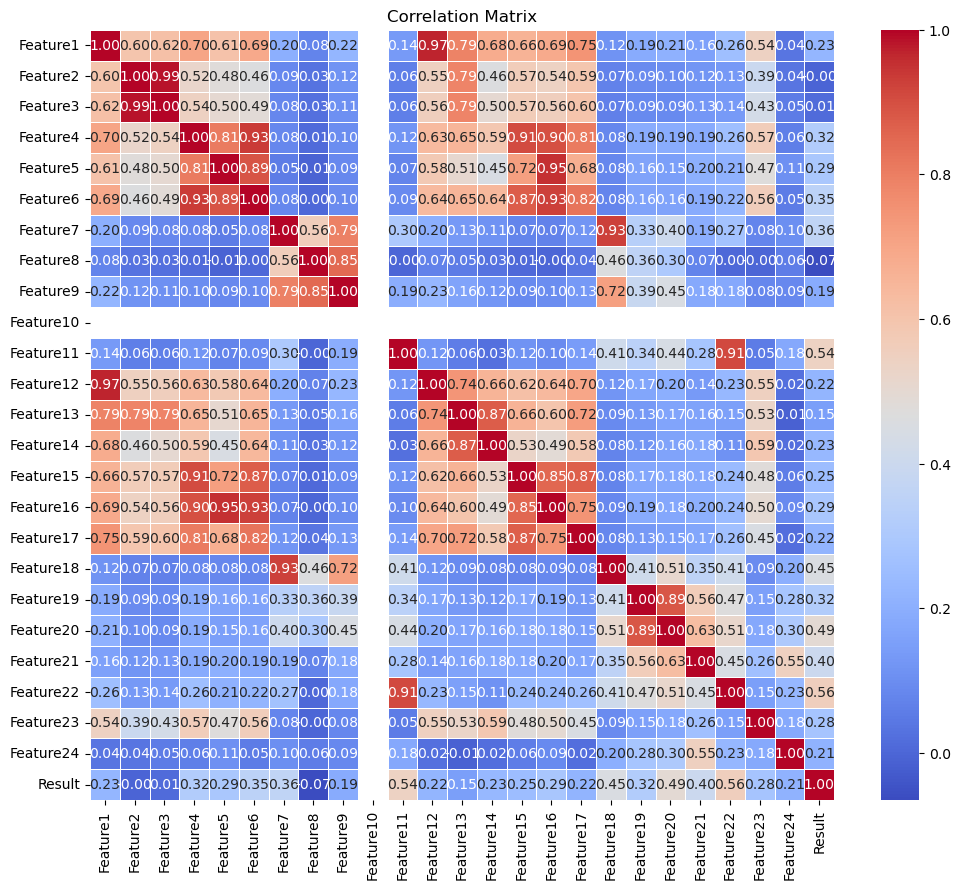

In [ ]:
# Visualize the correlation matrix
#This is meant for establishing the relationship between the features and the Target Variable
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

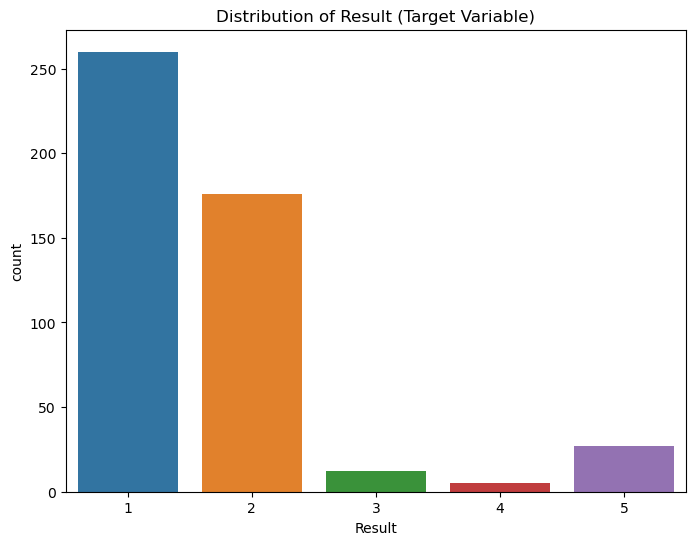

In [ ]:
# Explore the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df)
plt.title('Distribution of Result (Target Variable)')
plt.show()

# TASK 3:ANALYSIS, MODELLING AND PREDICTION

In [ ]:
import pandas as pd
from scipy import stats

# Select numerical features for outlier removal using Z-score
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the Z-score for each numerical feature
z_scores = stats.zscore(numerical_features)

# Define a threshold for Z-score to identify outliers
threshold = 3  # You can adjust this threshold based on your specific requirements

# Identify and remove outliers based on the Z-score
outliers = (abs(z_scores) > threshold).any(axis=1)
df_no_outliers = df[~outliers]

# Display the shape of the original and cleaned datasets
print("Original Dataset Shape:", df.shape)
print("Dataset Shape after Outlier Removal using Z-score:", df_no_outliers.shape)


Original Dataset Shape: (480, 25)
Dataset Shape after Outlier Removal using Z-score: (420, 25)


# LOGISTIC REGRESSION MODEL

In [ ]:
# Libraries for data manipulation and analysis
import pandas as pd   # Pandas is used for handling and manipulating tabular data

# Libraries for numerical operations
import numpy as np    # NumPy provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays

# Libraries for machine learning tasks
from sklearn.model_selection import train_test_split   # scikit-learn's train_test_split is used for splitting datasets into training and testing sets
from sklearn.linear_model import LogisticRegression   # scikit-learn's LogisticRegression is used for logistic regression modeling
from sklearn.metrics import accuracy_score   # scikit-learn's accuracy_score is used to evaluate the accuracy of a classification model
from sklearn.decomposition import PCA   # scikit-learn's PCA (Principal Component Analysis) is used for dimensionality reduction
from sklearn.preprocessing import StandardScaler   # scikit-learn's StandardScaler is used for standardizing features by removing the mean and scaling to unit variance

In [ ]:
# Modify the target variable into 2 classes
df['Modified_Result'] = df['Result'].apply(lambda x: 1 if x == 1 else 0)

# Split the dataset into features and target variable
X = df.drop(['Result', 'Modified_Result'], axis=1)
y = df['Modified_Result']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.03, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Apply Logit model with scaled data
logit_model = LogisticRegression(random_state=42, max_iter=1000)
logit_model.fit(X_train_scaled, y_train)

# Evaluate on the validation set
y_val_pred = logit_model.predict(X_val_scaled)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val:.4f}")


Validation Accuracy: 0.8667


Confusion Matrix:
[[6 0]
 [2 7]]


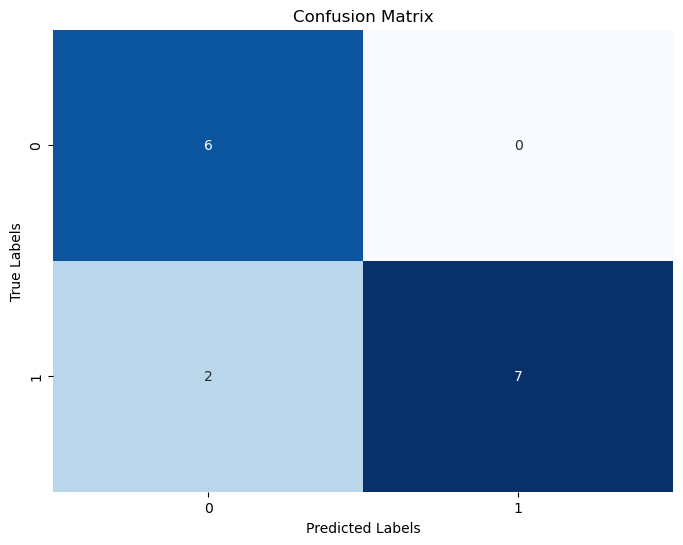


Accuracy: 0.8666666666666667
Precision: 0.9
Recall: 0.8666666666666667
F1 Score: 0.8678571428571428


In [ ]:
# Data visualization libraries
import seaborn as sns   # Seaborn is used for statistical data visualization based on Matplotlib

import matplotlib.pyplot as plt   # Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python

# Libraries for model evaluation metrics
from sklearn.metrics import (
    confusion_matrix,   # Confusion matrix to evaluate classification performance
    accuracy_score,     # Accuracy score to measure the accuracy of classification models
    precision_score,    # Precision score to measure the ability of a classification model to identify only relevant instances
    recall_score,       # Recall score to measure the ability of a classification model to capture all relevant instances
    f1_score            # F1 score is the harmonic mean of precision and recall and is used for balancing precision and recall
)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Display the results
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display evaluation metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




In [ ]:
# Statistical modeling library
import statsmodels.api as sm   # Statsmodels is used for estimating and testing statistical models

# Assuming X_train and y_train are your training data
X_train = sm.add_constant(X_train)  # Add a constant term for the intercept
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Display the summary
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.156973
         Iterations 14
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Modified_Result  Pseudo R-squared: 0.772     
Date:               2023-12-05 10:08 AIC:              193.9846  
No. Observations:   465              BIC:              293.3935  
Df Model:           23               Log-Likelihood:   -72.992   
Df Residuals:       441              LL-Null:          -320.84   
Converged:          1.0000           LLR p-value:      2.7753e-90
No. Iterations:     14.0000          Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------
Feature1       25.6671   7.2839  3.5238 0.0004   11.3909  39.9432
Feature2       -0.0013   0.0104 -0.1233 0.9019   -0.0216   0.0190

In [ ]:
# Libraries for model evaluation metrics
from sklearn.metrics import (
    accuracy_score,        # Accuracy score to measure the accuracy of classification models
    confusion_matrix,      # Confusion matrix to evaluate classification performance
    classification_report  # Classification report provides a comprehensive evaluation including precision, recall, and F1-score
)
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.03, random_state=42)

# Standardize the features (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)

# Display the explained variance ratio
print("Explained Variance Ratio:", np.sum(pca.explained_variance_ratio_))

# Split the PCA-transformed dataset
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42)

# Apply Logit model on PCA-transformed data
logit_model_pca = LogisticRegression(random_state=42)
logit_model_pca.fit(X_train_pca, y_train_pca)

# Evaluate on the validation set
y_val_pred_pca = logit_model_pca.predict(X_val_pca)

# Display the confusion matrix and other evaluation metrics
conf_matrix_pca = confusion_matrix(y_val_pca, y_val_pred_pca)
accuracy_pca = accuracy_score(y_val_pca, y_val_pred_pca)
classification_rep_pca = classification_report(y_val_pca, y_val_pred_pca)

print("Confusion Matrix (PCA):")
print(conf_matrix_pca)
print("\nAccuracy (PCA):", accuracy_pca)
print("\nClassification Report (PCA):")
print(classification_rep_pca)



Explained Variance Ratio: 0.9454344997670683
Confusion Matrix (PCA):
[[31  6]
 [ 0 56]]

Accuracy (PCA): 0.9354838709677419

Classification Report (PCA):
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        37
           1       0.90      1.00      0.95        56

    accuracy                           0.94        93
   macro avg       0.95      0.92      0.93        93
weighted avg       0.94      0.94      0.93        93



# BONUS TASKS: ANALYSIS, MODELLING AND PREDICTION

# DECISION TREE MODEL

In [ ]:
# Data manipulation and analysis library
import pandas as pd   # Pandas is used for handling and manipulating tabular data

# Machine learning libraries
from sklearn.tree import DecisionTreeClassifier   # scikit-learn's DecisionTreeClassifier is used for decision tree-based classification

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score,          # Accuracy score to measure the accuracy of classification models
    precision_score,         # Precision score to measure the ability of a classification model to identify only relevant instances
    recall_score,            # Recall score to measure the ability of a classification model to capture all relevant instances
    f1_score,                # F1 score is the harmonic mean of precision and recall and is used for balancing precision and recall
    classification_report,   # Classification report provides a comprehensive evaluation including precision, recall, and F1-score
    confusion_matrix         # Confusion matrix to evaluate classification performance
)

# Data splitting for model training and testing
from sklearn.model_selection import train_test_split   # scikit-learn's train_test_split is used for splitting datasets into training and testing sets

# Dimensionality reduction technique
from sklearn.decomposition import PCA   # scikit-learn's PCA (Principal Component Analysis) is used for dimensionality reduction


In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.03, random_state=42)

# Instantiate Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = dt_model.predict(X_val)

In [ ]:
# Print the confusion matrix and other evaluation metrics
conf_matrix = confusion_matrix(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


Confusion Matrix:
[[5 1]
 [1 8]]

Accuracy: 0.8666666666666667
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 Score: 0.8888888888888888

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.89      0.89      0.89         9

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15



In [ ]:
# Implement PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [ ]:
# Apply Decision Tree model on the reduced feature set
dt_model_pca = DecisionTreeClassifier(random_state=42)
dt_model_pca.fit(X_train_pca, y_train)

# Evaluate on the validation set with reduced features
y_val_pred_pca = dt_model_pca.predict(X_val_pca)


In [ ]:
# Print the confusion matrix and other evaluation metrics after PCA
conf_matrix_pca = confusion_matrix(y_val, y_val_pred_pca)
accuracy_pca = accuracy_score(y_val, y_val_pred_pca)
precision_pca = precision_score(y_val, y_val_pred_pca)
recall_pca = recall_score(y_val, y_val_pred_pca)
f1_pca = f1_score(y_val, y_val_pred_pca)

print("\nConfusion Matrix (PCA):")
print(conf_matrix_pca)
print("\nAccuracy (PCA):", accuracy_pca)
print("Precision (PCA):", precision_pca)
print("Recall (PCA):", recall_pca)
print("F1 Score (PCA):", f1_pca)
print("\nClassification Report (PCA):")
print(classification_report(y_val, y_val_pred_pca))



Confusion Matrix (PCA):
[[6 0]
 [3 6]]

Accuracy (PCA): 0.8
Precision (PCA): 1.0
Recall (PCA): 0.6666666666666666
F1 Score (PCA): 0.8

Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.67      0.80         9

    accuracy                           0.80        15
   macro avg       0.83      0.83      0.80        15
weighted avg       0.87      0.80      0.80        15



In [ ]:
# Get feature importances from the Decision Tree model
feature_importance = dt_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
top_10_features = feature_importance_df.head(10)
print("Top 10 Important Features:")
print(top_10_features)

Top 10 Important Features:
      Feature  Importance
13  Feature14    0.387776
15  Feature16    0.163834
1    Feature2    0.106288
2    Feature3    0.092506
5    Feature6    0.047512
0    Feature1    0.028984
10  Feature11    0.027620
12  Feature13    0.026832
4    Feature5    0.026636
21  Feature22    0.025888


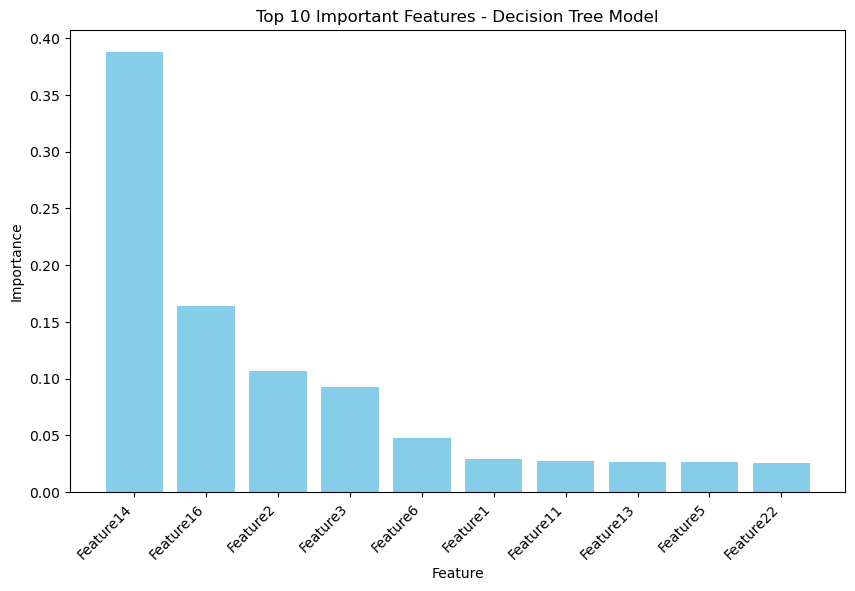

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title('Top 10 Important Features - Decision Tree Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# K-Nearest Neighbors (KNN) model

In [ ]:
# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier   # scikit-learn's KNeighborsClassifier is used for k-nearest neighbors classification

# Dimensionality reduction technique
from sklearn.decomposition import PCA   # scikit-learn's PCA (Principal Component Analysis) is used for dimensionality reduction

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score,          # Accuracy score to measure the accuracy of classification models
    precision_score,         # Precision score to measure the ability of a classification model to identify only relevant instances
    recall_score,            # Recall score to measure the ability of a classification model to capture all relevant instances
    f1_score,                # F1 score is the harmonic mean of precision and recall and is used for balancing precision and recall
    confusion_matrix,        # Confusion matrix to evaluate classification performance
    classification_report    # Classification report provides a comprehensive evaluation including precision, recall, and F1-score
)

# Data splitting for model training and testing
from sklearn.model_selection import train_test_split   # scikit-learn's train_test_split is used for splitting datasets into training and testing sets

# Data preprocessing library
from sklearn.preprocessing import StandardScaler   # scikit-learn's StandardScaler is used for standardizing features by removing the mean and scaling to unit variance


# Assuming X and y are your feature matrix and target variable
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # You can adjust the explained variance ratio threshold
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [ ]:
# Instantiate KNN model
knn_model_pca = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed

# Train the model on the PCA-transformed data
knn_model_pca.fit(X_train_pca, y_train)

# Evaluate on the validation set
y_val_pred_pca = knn_model_pca.predict(X_val_pca)

# Display model performance metrics after PCA
print("Confusion Matrix (PCA):")
print(confusion_matrix(y_val, y_val_pred_pca))

print("\nAccuracy (PCA):", accuracy_score(y_val, y_val_pred_pca))
print("Precision (PCA):", precision_score(y_val, y_val_pred_pca))
print("Recall (PCA):", recall_score(y_val, y_val_pred_pca))
print("F1 Score (PCA):", f1_score(y_val, y_val_pred_pca))

print("\nClassification Report (PCA):")
print(classification_report(y_val, y_val_pred_pca))

Confusion Matrix (PCA):
[[31  8]
 [ 7 50]]

Accuracy (PCA): 0.84375
Precision (PCA): 0.8620689655172413
Recall (PCA): 0.8771929824561403
F1 Score (PCA): 0.8695652173913043

Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        39
           1       0.86      0.88      0.87        57

    accuracy                           0.84        96
   macro avg       0.84      0.84      0.84        96
weighted avg       0.84      0.84      0.84        96

